In [1]:
import pandas as pd

data = pd.read_csv('Downloads/ufc-master.csv')

pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')

#data.count()
#data.info()
data.head()

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Date,Location,Country,Winner,...,FinishDetails,FinishRound,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
0,Brandon Moreno,Amir Albazi,-180.0,150.0,55.5556,150.0,2024-11-02,"Edmonton, Alberta, Canada",Canada,Red,...,NaN,5.0,5:00,1500.0,130.0,215.0,800.0,1100.0,400.0,1600.0
1,Erin Blanchfield,Rose Namajunas,-155.0,130.0,64.5161,130.0,2024-11-02,"Edmonton, Alberta, Canada",Canada,Red,...,NaN,5.0,5:00,1500.0,140.0,180.0,450.0,1600.0,1600.0,650.0
2,Caio Machado,Brendson Ribeiro,-192.0,160.0,52.0833,160.0,2024-11-02,"Edmonton, Alberta, Canada",Canada,Blue,...,NaN,3.0,5:00,900.0,300.0,500.0,800.0,600.0,200.0,350.0
3,Ariane da Silva,Jasmine Jasudavicius,190.0,-250.0,190.0000,40.0,2024-11-02,"Edmonton, Alberta, Canada",Canada,Blue,...,D'Arce Choke,3.0,2:28,748.0,300.0,-110.0,2000.0,450.0,800.0,750.0
4,Marc-Andre Barriault,Dustin Stoltzfus,-270.0,220.0,37.0370,220.0,2024-11-02,"Edmonton, Alberta, Canada",Canada,Blue,...,Punch,1.0,4:28,268.0,150.0,350.0,1800.0,800.0,225.0,800.0


In [2]:
data = data.drop(columns=['RWFlyweightRank', 'RWFeatherweightRank', 'RWStrawweightRank','RWBantamweightRank', 'RHeavyweightRank','RLightHeavyweightRank','RMiddleweightRank',
                          'RWelterweightRank','RLightweightRank','RFeatherweightRank','RBantamweightRank', 'RFlyweightRank','RPFPRank','BWFlyweightRank','BWFeatherweightRank',
                          'BWStrawweightRank','BWBantamweightRank','BHeavyweightRank','BLightHeavyweightRank','BMiddleweightRank','BWelterweightRank','BLightweightRank','BFeatherweightRank',
                          'BBantamweightRank','BFlyweightRank','BPFPRank','RedExpectedValue','BlueExpectedValue','Date','Country','Location','TitleBout','WeightClass','Gender',
                          'NumberOfRounds','BMatchWCRank','RMatchWCRank','Finish','FinishDetails','FinishRound','FinishRoundTime',
                          'TotalFightTimeSecs','RedDecOdds','BlueDecOdds','RSubOdds','BSubOdds','RKOOdds','BKOOdds','EmptyArena'])

data = data.dropna()

data['Winner'].replace(['Red','Blue'],[1,0], inplace=True)
data['BetterRank'].replace(['Red','Blue','neither'],[1,-1,0], inplace=True)

data = pd.get_dummies(data, columns=['BlueStance','RedStance'])

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5204 entries, 0 to 6477
Data columns (total 75 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   RedFighter                   5204 non-null   object 
 1   BlueFighter                  5204 non-null   object 
 2   RedOdds                      5204 non-null   float64
 3   BlueOdds                     5204 non-null   float64
 4   Winner                       5204 non-null   int64  
 5   BlueCurrentLoseStreak        5204 non-null   int64  
 6   BlueCurrentWinStreak         5204 non-null   int64  
 7   BlueDraws                    5204 non-null   int64  
 8   BlueAvgSigStrLanded          5204 non-null   float64
 9   BlueAvgSigStrPct             5204 non-null   float64
 10  BlueAvgSubAtt                5204 non-null   float64
 11  BlueAvgTDLanded              5204 non-null   float64
 12  BlueAvgTDPct                 5204 non-null   float64
 13  BlueLongestWinStre

In [3]:
def Odds_Calculator(x):
    if x < 0:
        percent = -x / (-x + 100)
    if x > 0: 
        percent = 100 / (x + 100)
    return percent

data['Red Implied Odds'] = data['RedOdds'].map(Odds_Calculator)
data['Blue Implied Odds'] = data['BlueOdds'].map(Odds_Calculator)
data

,RedFighter,BlueFighter,RedOdds,BlueOdds,Winner,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueDraws,BlueAvgSigStrLanded,BlueAvgSigStrPct,...,BlueStance_Open Stance,BlueStance_Orthodox,BlueStance_Southpaw,BlueStance_Switch,RedStance_Open Stance,RedStance_Orthodox,RedStance_Southpaw,RedStance_Switch,Red Implied Odds,Blue Implied Odds
0,Brandon Moreno,Amir Albazi,-180.0,150.0,1,0,5,0,2.7200,0.340,...,0,1,0,0,0,1,0,0,0.642857,0.400000
1,Erin Blanchfield,Rose Namajunas,-155.0,130.0,1,0,2,0,3.7100,0.420,...,0,1,0,0,0,1,0,0,0.607843,0.434783
2,Caio Machado,Brendson Ribeiro,-192.0,160.0,0,2,0,0,3.1600,0.420,...,0,1,0,0,0,0,1,0,0.657534,0.384615
3,Ariane da Silva,Jasmine Jasudavicius,190.0,-250.0,0,0,2,0,3.7000,0.440,...,0,1,0,0,0,1,0,0,0.344828,0.714286
4,Marc-Andre Barriault,Dustin Stoltzfus,-270.0,220.0,0,1,0,0,3.4700,0.440,...,0,1,0,0,0,1,0,0,0.729730,0.312500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6470,Alessio Sakara,James Irvin,-120.0,100.0,1,1,0,0,5.2500,0.555,...,0,1,0,0,0,1,0,0,0.545455,0.500000
6471,Clay Guida,Shannon Gugerty,-420.0,335.0,1,1,0,0,10.7500,0.333,...,0,1,0,0,0,1,0,0,0.807692,0.229885
6472,Eliot Marshall,Vladimir Matyushenko,145.0,-165.0,0,0,1,0,22.1667,0.510,...,0,1,0,0,0,1,0,0,0.408163,0.622642
6475,Brendan Schaub,Chase Gormley,-260.0,220.0,1,1,0,0,8.0000,0.340,...,0,1,0,0,0,1,0,0,0.722222,0.312500


In [16]:
buckets = pd.cut(data['Red Implied Odds'], 20)
pd.value_counts(buckets)

(0.581, 0.623]    555
(0.706, 0.747]    443
(0.664, 0.706]    422
(0.623, 0.664]    385
(0.747, 0.789]    371
(0.415, 0.457]    369
(0.54, 0.581]     345
(0.498, 0.54]     341
(0.332, 0.374]    303
(0.374, 0.415]    297
(0.789, 0.83]     292
(0.457, 0.498]    255
(0.291, 0.332]    180
(0.83, 0.872]     180
(0.249, 0.291]    165
(0.872, 0.913]    115
(0.208, 0.249]     80
(0.166, 0.208]     57
(0.913, 0.955]     31
(0.124, 0.166]     18
Name: Red Implied Odds, dtype: int64

In [12]:
data['Red Odds Buckets'] = pd.cut(data['Red Implied Odds'], 20)
data.head()

,RedFighter,BlueFighter,RedOdds,BlueOdds,Winner,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueDraws,BlueAvgSigStrLanded,BlueAvgSigStrPct,...,BlueStance_Orthodox,BlueStance_Southpaw,BlueStance_Switch,RedStance_Open Stance,RedStance_Orthodox,RedStance_Southpaw,RedStance_Switch,Red Implied Odds,Blue Implied Odds,Red Odds Buckets
0,Brandon Moreno,Amir Albazi,-180.0,150.0,1,0,5,0,2.72,0.34,...,1,0,0,0,1,0,0,0.642857,0.400000,"(0.623, 0.664]"
1,Erin Blanchfield,Rose Namajunas,-155.0,130.0,1,0,2,0,3.71,0.42,...,1,0,0,0,1,0,0,0.607843,0.434783,"(0.581, 0.623]"
2,Caio Machado,Brendson Ribeiro,-192.0,160.0,0,2,0,0,3.16,0.42,...,1,0,0,0,0,1,0,0.657534,0.384615,"(0.623, 0.664]"
3,Ariane da Silva,Jasmine Jasudavicius,190.0,-250.0,0,0,2,0,3.70,0.44,...,1,0,0,0,1,0,0,0.344828,0.714286,"(0.332, 0.374]"
4,Marc-Andre Barriault,Dustin Stoltzfus,-270.0,220.0,0,1,0,0,3.47,0.44,...,1,0,0,0,1,0,0,0.729730,0.312500,"(0.706, 0.747]"


In [37]:
data_count = data.groupby('Red Odds Buckets').size().reset_index(name='counts')
data_count

,Red Odds Buckets,counts
0,"(0.124, 0.166]",18
1,"(0.166, 0.208]",57
2,"(0.208, 0.249]",80
3,"(0.249, 0.291]",165
4,"(0.291, 0.332]",180
5,"(0.332, 0.374]",303
6,"(0.374, 0.415]",297
7,"(0.415, 0.457]",369
8,"(0.457, 0.498]",255
9,"(0.498, 0.54]",341


In [39]:
data_winners = data.groupby('Red Odds Buckets')['Winner'].sum().reset_index(name='winner_count')
data_winners

,Red Odds Buckets,winner_count
0,"(0.124, 0.166]",1
1,"(0.166, 0.208]",13
2,"(0.208, 0.249]",13
3,"(0.249, 0.291]",52
4,"(0.291, 0.332]",66
5,"(0.332, 0.374]",109
6,"(0.374, 0.415]",108
7,"(0.415, 0.457]",174
8,"(0.457, 0.498]",122
9,"(0.498, 0.54]",183


In [40]:
winnerstats_df = pd.DataFrame({'Red Odds Buckets':data_winners['Red Odds Buckets'], 'Total':data_count['counts'],
                               'Winners':data_winners['winner_count'], 
                               'Winning Percentage': data_winners['winner_count'] / data_count['counts']})
winnerstats_df

,Red Odds Buckets,Total,Winners,Winning Percentage
0,"(0.124, 0.166]",18,1,0.055556
1,"(0.166, 0.208]",57,13,0.228070
2,"(0.208, 0.249]",80,13,0.162500
3,"(0.249, 0.291]",165,52,0.315152
4,"(0.291, 0.332]",180,66,0.366667
5,"(0.332, 0.374]",303,109,0.359736
6,"(0.374, 0.415]",297,108,0.363636
7,"(0.415, 0.457]",369,174,0.471545
8,"(0.457, 0.498]",255,122,0.478431
9,"(0.498, 0.54]",341,183,0.536657


In [44]:
import numpy as np

print(np.average(data['Red Implied Odds']))
print(np.average(data['Blue Implied Odds']))
print(data['Winner'].sum() / data['Winner'].count())

0.5775082772551944
0.4578306317793267
0.5768639508070715


In [48]:
average_odds = data.groupby('Red Odds Buckets')['Red Implied Odds'].mean().reset_index(name='average odds')
average_odds

,Red Odds Buckets,average odds
0,"(0.124, 0.166]",0.146735
1,"(0.166, 0.208]",0.187527
2,"(0.208, 0.249]",0.229213
3,"(0.249, 0.291]",0.271357
4,"(0.291, 0.332]",0.313723
5,"(0.332, 0.374]",0.354357
6,"(0.374, 0.415]",0.393825
7,"(0.415, 0.457]",0.435136
8,"(0.457, 0.498]",0.475736
9,"(0.498, 0.54]",0.518221


In [53]:
winnerstats_df['average odds'] = average_odds.iloc[:,1]
winnerstats_df['odds difference'] = round(winnerstats_df['Winning Percentage'] - winnerstats_df['average odds'],2)
winnerstats_df

,Red Odds Buckets,Total,Winners,Winning Percentage,average odds,odds difference
0,"(0.124, 0.166]",18,1,0.055556,0.146735,-0.09
1,"(0.166, 0.208]",57,13,0.228070,0.187527,0.04
2,"(0.208, 0.249]",80,13,0.162500,0.229213,-0.07
3,"(0.249, 0.291]",165,52,0.315152,0.271357,0.04
4,"(0.291, 0.332]",180,66,0.366667,0.313723,0.05
5,"(0.332, 0.374]",303,109,0.359736,0.354357,0.01
6,"(0.374, 0.415]",297,108,0.363636,0.393825,-0.03
7,"(0.415, 0.457]",369,174,0.471545,0.435136,0.04
8,"(0.457, 0.498]",255,122,0.478431,0.475736,0.00
9,"(0.498, 0.54]",341,183,0.536657,0.518221,0.02


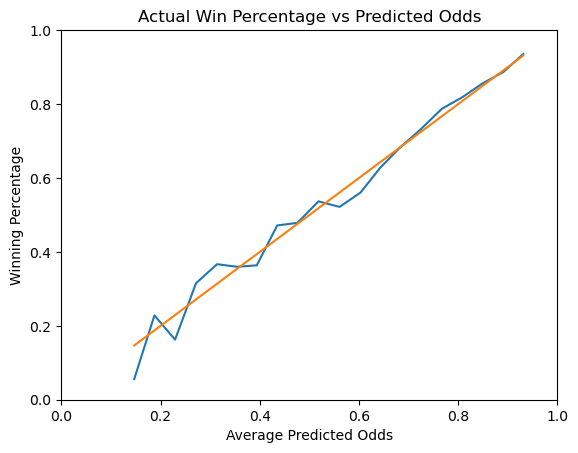

In [60]:
import matplotlib.pyplot as plt

x = winnerstats_df['average odds']
y = winnerstats_df['Winning Percentage']
z = winnerstats_df['average odds']

fig, ax = plt.subplots()

ax.plot(x, y)
ax.plot(x, z)

ax.set_xlabel('Average Predicted Odds')
ax.set_ylabel('Winning Percentage')
ax.set_title('Actual Win Percentage vs Predicted Odds')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

plt.show()